In [67]:
# Libraries
import pandas as pd

In [68]:
# Importing recipes data
df = pd.read_csv('D:/Local Disk/Projects/Data camp/recipe_site_traffic_2212.csv')

# Data Preparation

In [69]:
# structure of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 947 entries, 0 to 946
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   recipe        947 non-null    int64  
 1   calories      895 non-null    float64
 2   carbohydrate  895 non-null    float64
 3   sugar         895 non-null    float64
 4   protein       895 non-null    float64
 5   category      947 non-null    object 
 6   servings      947 non-null    object 
 7   high_traffic  574 non-null    object 
dtypes: float64(4), int64(1), object(3)
memory usage: 59.3+ KB


The dataset had 947 observations and 8 variables.

There were 5 variables that had some form of missin values, that is; Calories, Carbohydrates, Sugar, Protein, and high_traffic

## Counting the missing values

In [70]:
# Counting the missing values
missing_count = df.isnull().sum()
print(missing_count)

recipe            0
calories         52
carbohydrate     52
sugar            52
protein          52
category          0
servings          0
high_traffic    373
dtype: int64


In [71]:
# Converting to percentages
missing_percent = (missing_count / len(df)) * 100
print(missing_percent)

recipe           0.000000
calories         5.491024
carbohydrate     5.491024
sugar            5.491024
protein          5.491024
category         0.000000
servings         0.000000
high_traffic    39.387540
dtype: float64


In [72]:
# Organizing into a table
missing_data = pd.DataFrame({'count': missing_count, 'percent': missing_percent})
print(missing_data)

              count    percent
recipe            0   0.000000
calories         52   5.491024
carbohydrate     52   5.491024
sugar            52   5.491024
protein          52   5.491024
category          0   0.000000
servings          0   0.000000
high_traffic    373  39.387540


Since all the variable have missing_value percentage below 50%, I am going to impute them to handle the missingness

### Handling the missing variables

### 1. High_traffic

In [73]:
# Identifying categories
df["high_traffic"].unique()

array(['High', nan], dtype=object)

In [74]:
# Replace the "nan"
df["high_traffic"].fillna("Low", inplace=True)

# Confirming the changes
df["high_traffic"].unique()

C:\Users\ekiru\AppData\Local\Temp\ipykernel_17188\2330145325.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["high_traffic"].fillna("Low", inplace=True)


array(['High', 'Low'], dtype=object)

### 2. Calories

In [75]:
# Understanding distribution
df["calories"].describe()

count     895.000000
mean      435.939196
std       453.020997
min         0.140000
25%       110.430000
50%       288.550000
75%       597.650000
max      3633.160000
Name: calories, dtype: float64

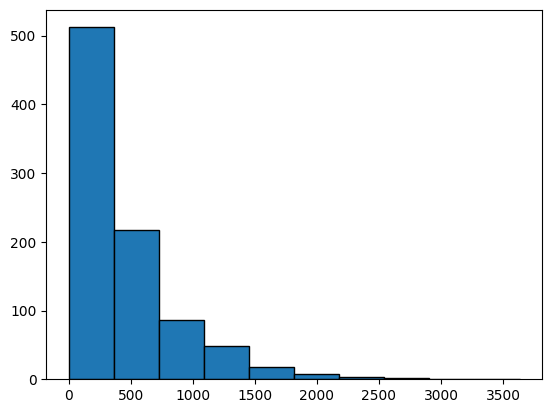

In [76]:
import matplotlib.pyplot as plt

# Plotting the distribution
plt.hist(df["calories"], bins=10, density=False, edgecolor='black')

plt.show()

Since the "calories" data is skewed, the median will be used to impute

In [77]:
# Handling the missing values
median_value = df["calories"].median()
df["calories"].fillna(median_value, inplace=True)

# confirming changes
df["calories"].describe()

C:\Users\ekiru\AppData\Local\Temp\ipykernel_17188\2383131409.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["calories"].fillna(median_value, inplace=True)


count     947.000000
mean      427.846019
std       441.673556
min         0.140000
25%       114.410000
50%       288.550000
75%       576.225000
max      3633.160000
Name: calories, dtype: float64

### 3. Cabohydrates

In [78]:
df["carbohydrate"].describe()

count    895.000000
mean      35.069676
std       43.949032
min        0.030000
25%        8.375000
50%       21.480000
75%       44.965000
max      530.420000
Name: carbohydrate, dtype: float64

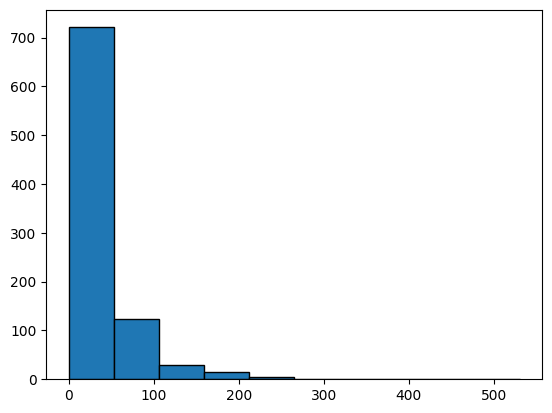

In [79]:
import matplotlib.pyplot as plt

# Plotting the distribution
plt.hist(df["carbohydrate"], bins=10, density=False, edgecolor='black')

plt.show()

In [80]:
# Imputing using the median
median_value = df["carbohydrate"].median()

df["carbohydrate"].fillna(median_value, inplace=True)

C:\Users\ekiru\AppData\Local\Temp\ipykernel_17188\881798201.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["carbohydrate"].fillna(median_value, inplace=True)


### 4. Sugar

In [81]:
df["sugar"].describe()

count    895.000000
mean       9.046547
std       14.679176
min        0.010000
25%        1.690000
50%        4.550000
75%        9.800000
max      148.750000
Name: sugar, dtype: float64

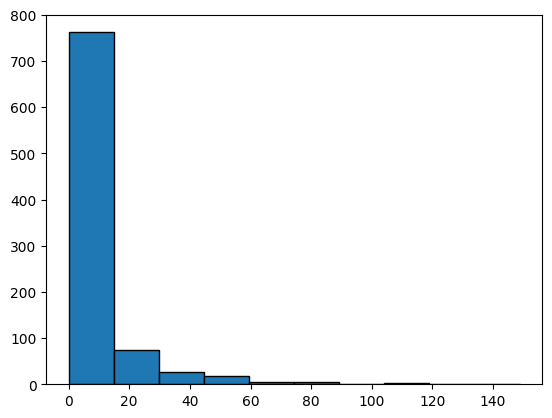

In [82]:
import matplotlib.pyplot as plt

# Plotting the distribution
plt.hist(df["sugar"], bins=10, density=False, edgecolor='black')

plt.show()

In [83]:
# Handling the missing values
median_value = df["sugar"].median()
df["sugar"].fillna(median_value, inplace=True)

C:\Users\ekiru\AppData\Local\Temp\ipykernel_17188\3793727808.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["sugar"].fillna(median_value, inplace=True)


### 5. Proteins

In [84]:
df["protein"].describe()

count    895.000000
mean      24.149296
std       36.369739
min        0.000000
25%        3.195000
50%       10.800000
75%       30.200000
max      363.360000
Name: protein, dtype: float64

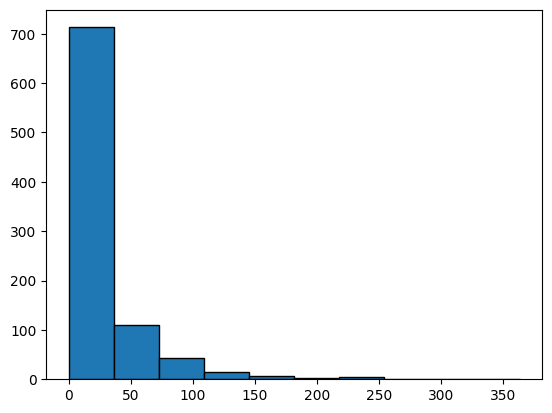

In [85]:
import matplotlib.pyplot as plt

# Plotting the distribution
plt.hist(df["protein"], bins=10, density=False, edgecolor='black')

plt.show()

In [86]:
# Handling the missing values
median_value = df["protein"].median()
df["protein"].fillna(median_value, inplace=True)

C:\Users\ekiru\AppData\Local\Temp\ipykernel_17188\1126928724.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["protein"].fillna(median_value, inplace=True)


# Exploratory Data Analysis

### High_calories

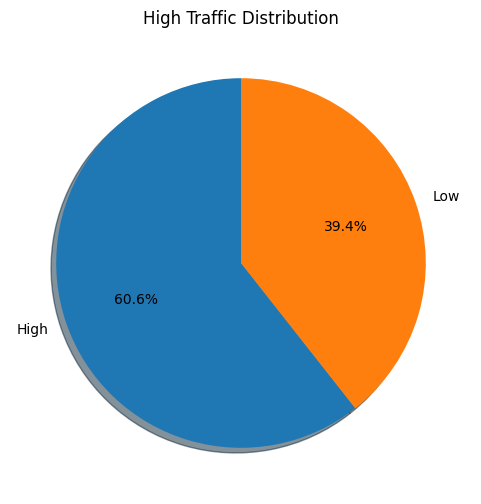

In [87]:
# Pie chart
high_traffic_count = df["high_traffic"].value_counts()

plt.figure(figsize=(6,6))
plt.pie(
    high_traffic_count,
    labels=high_traffic_count.index,
    autopct='%1.1f%%',
    startangle=90,
    shadow=True
)
plt.title("High Traffic Distribution")
plt.show()

Most of the sites had high traffic estimating to 60.5%

### Category

In [88]:
df["category"].unique()

array(['Pork', 'Potato', 'Breakfast', 'Beverages', 'One Dish Meal',
       'Chicken Breast', 'Lunch/Snacks', 'Chicken', 'Vegetable', 'Meat',
       'Dessert'], dtype=object)

In [89]:
category_count = df["category"].value_counts()

category_percent = df["category"].value_counts(normalize=True) * 100

category_summary = pd.DataFrame({
    "counts":category_count,
    "percentage":category_percent
})
category_summary

,counts,percentage
category,,
Breakfast,106,11.193242
Chicken Breast,98,10.348469
Beverages,92,9.714889
Lunch/Snacks,89,9.398099
Potato,88,9.292503
Pork,84,8.870116
Vegetable,83,8.764520
Dessert,83,8.764520
Meat,79,8.342133


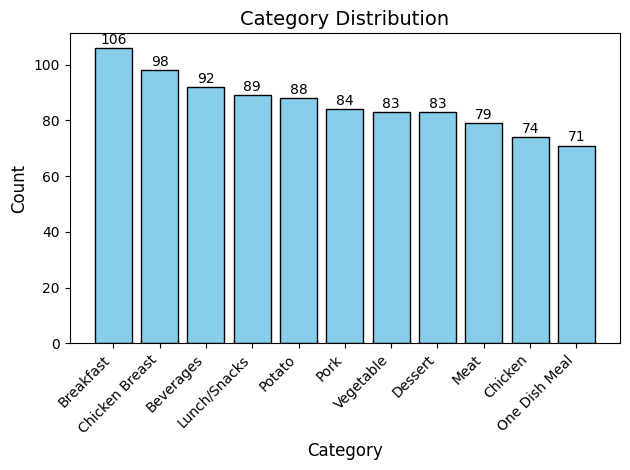

In [90]:
# Bar plot
plt.bar(category_summary.index, category_summary['counts'], color='skyblue', edgecolor='black')

# Add labels and title
plt.title("Category Distribution", fontsize=14)
plt.xlabel("Category", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=45, ha='right')

# Add value labels on top of each bar
for i, val in enumerate(category_summary['counts']):
    plt.text(i, val + 0.5, str(val), ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

The breatfast type of recipe was the most common with a the highest measure of 106

### Scatter plot

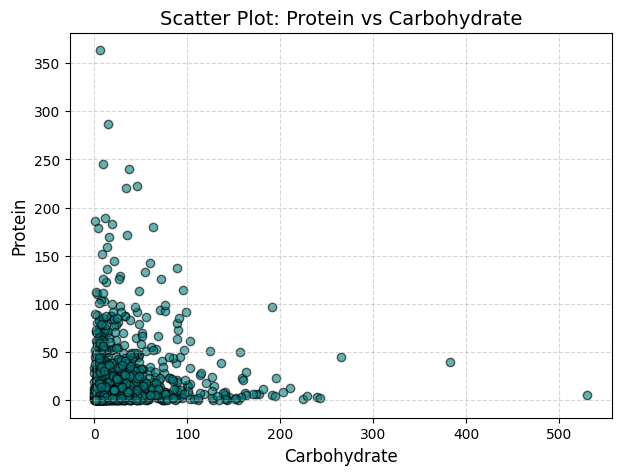

In [91]:
plt.figure(figsize=(7,5))
plt.scatter(df['carbohydrate'], df['protein'], color='teal', alpha=0.6, edgecolor='k')

plt.title("Scatter Plot: Protein vs Carbohydrate", fontsize=14)
plt.xlabel("Carbohydrate", fontsize=12)
plt.ylabel("Protein", fontsize=12)

plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

There was a negative linear relationship between the amount of protein and carbohydrate, that is; if the amount of protein in grams increases the amount of carbohydrates decreases.

# Model Development

In [92]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, precision_recall_fscore_support, roc_auc_score,classification_report, confusion_matrix)
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer


In [93]:
df.columns

Index(['recipe', 'calories', 'carbohydrate', 'sugar', 'protein', 'category',
       'servings', 'high_traffic'],
      dtype='object')

In [94]:
# Generating the X and y dataset
X = df[['calories', 'carbohydrate', 'sugar', 'protein', 'category','servings']]

y = df['high_traffic'].apply(lambda x: 1 if x == 'High' else 0)


In [95]:
# df['servings'].unique()

# Converting to numeric
X['servings'] = pd.to_numeric(X['servings'], errors='coerce')

median_value = X["servings"].median()
X["servings"].fillna(median_value, inplace=True)

C:\Users\ekiru\AppData\Local\Temp\ipykernel_17188\3716166174.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['servings'] = pd.to_numeric(X['servings'], errors='coerce')
C:\Users\ekiru\AppData\Local\Temp\ipykernel_17188\3716166174.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  

In [96]:
# Categorizing features
numeric_features = ['calories', 'carbohydrate', 'sugar', 'protein', 'servings']
categorical_features = ['category']

# Preprocessing pipelines
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])


In [97]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)
print("Target distribution in train set:")
print(y_train.value_counts(normalize=True))

Train shape: (757, 6)
Test shape: (190, 6)
Target distribution in train set:
high_traffic
1    0.606341
0    0.393659
Name: proportion, dtype: float64


The data was split using the 80/20 ratio. The training dataset had 757 observations while the testing dataset had 190 observations

### **Running a Logistic Regression Model**

In [98]:
# Checking if there exist any missing values
X.isnull().sum()

calories        0
carbohydrate    0
sugar           0
protein         0
category        0
servings        0
dtype: int64

In [99]:
# Creating a pipeline
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])

In [100]:
# Training the model
model.fit(X_train, y_train)

# Making predictions
y_pred_lr = model.predict(X_test)
y_proba_lr = model.predict_proba(X_test)[:, 1]

# Evaluation
print("Baseline Model Performance (Logistic Regression):")
print(f"Accuracy: {accuracy_score(y_test, y_pred_lr):.3f}")
print(f"ROC-AUC:  {roc_auc_score(y_test, y_proba_lr):.3f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_lr, target_names=['Low Traffic', 'High Traffic']))


Baseline Model Performance (Logistic Regression):
Accuracy: 0.774
ROC-AUC:  0.866

Classification Report:
              precision    recall  f1-score   support

 Low Traffic       0.69      0.79      0.73        75
High Traffic       0.85      0.77      0.80       115

    accuracy                           0.77       190
   macro avg       0.77      0.78      0.77       190
weighted avg       0.78      0.77      0.78       190



The Logistic regression achieved an accuracy of 77.4% and an Arrea under the curve of 86.6%

In [101]:
# Confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_lr))

Confusion Matrix:
[[59 16]
 [27 88]]


The Logistic regression model correctly predicted 59 observations as high traffic recipes and wrongly classified 16 as low traffic recipes. Whereas, it correctly classified 88 observations as low traffic recipe and wrongly classified 27 as being high traffic recipes.

### **Decision Tree**

In [102]:
from sklearn.tree import DecisionTreeClassifier

In [103]:
# Defining pipeline
dt_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(random_state=42))
])

# Fiting the model
dt_model.fit(X_train, y_train)

# Making predictions
y_pred_dt = dt_model.predict(X_test)
y_proba_dt = dt_model.predict_proba(X_test)[:, 1]


In [104]:
# Evaluation
print("Baseline Model Performance (Decision Tree):")
print(f"Accuracy: {accuracy_score(y_test, y_pred_dt):.3f}")
print(f"ROC-AUC:  {roc_auc_score(y_test, y_proba_dt):.3f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_dt, target_names=['Low Traffic', 'High Traffic']))

Baseline Model Performance (Decision Tree):
Accuracy: 0.642
ROC-AUC:  0.649

Classification Report:
              precision    recall  f1-score   support

 Low Traffic       0.54      0.68      0.60        75
High Traffic       0.75      0.62      0.68       115

    accuracy                           0.64       190
   macro avg       0.64      0.65      0.64       190
weighted avg       0.66      0.64      0.65       190



In [105]:
# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_dt))

Confusion Matrix:
[[51 24]
 [44 71]]


### **Random Forest model**

In [106]:
from sklearn.ensemble import RandomForestClassifier

In [107]:
# Defining pipeline
rf_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Training the model
rf_model.fit(X_train, y_train)

# making predictions
y_pred_rf = rf_model.predict(X_test)
y_proba_rf = rf_model.predict_proba(X_test)[:, 1]


In [108]:

# Evaluation
print("Baseline Model Performance (Random Forest):")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.3f}")
print(f"ROC-AUC:  {roc_auc_score(y_test, y_proba_rf):.3f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf, target_names=['Low Traffic', 'High Traffic']))

Baseline Model Performance (Random Forest):
Accuracy: 0.711
ROC-AUC:  0.831

Classification Report:
              precision    recall  f1-score   support

 Low Traffic       0.61      0.72      0.66        75
High Traffic       0.79      0.70      0.75       115

    accuracy                           0.71       190
   macro avg       0.70      0.71      0.70       190
weighted avg       0.72      0.71      0.71       190



In [109]:
# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))

Confusion Matrix:
[[54 21]
 [34 81]]


# Model Performance

In [110]:
# Comparing model performance
model_performance = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest'],
    'Accuracy': [
        accuracy_score(y_test, y_pred_lr),
        accuracy_score(y_test, y_pred_dt),
        accuracy_score(y_test, y_pred_rf)
    ],
    'ROC_AUC': [
        roc_auc_score(y_test, y_proba_lr),
        roc_auc_score(y_test, y_proba_dt),
        roc_auc_score(y_test, y_proba_rf)
    ]
})

print(model_performance)


                 Model  Accuracy   ROC_AUC
0  Logistic Regression  0.773684  0.866087
1        Decision Tree  0.642105  0.649101
2        Random Forest  0.710526  0.831478


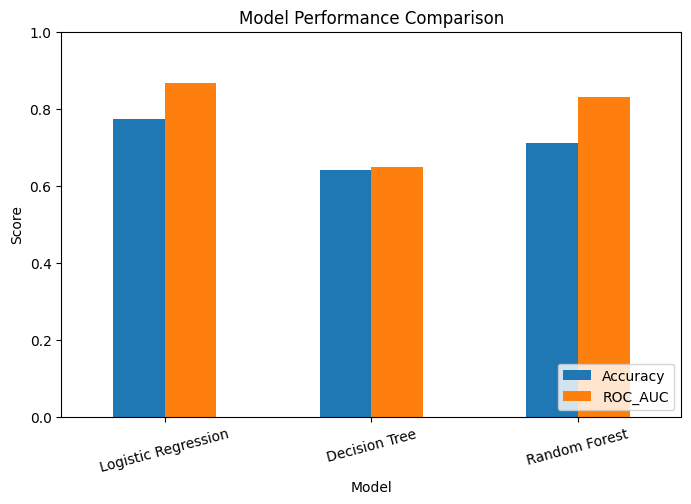

In [111]:
# Plotting performance comparison
model_performance.plot(x='Model', y=['Accuracy', 'ROC_AUC'], kind='bar', figsize=(8,5))
plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.xticks(rotation=15)
plt.legend(loc='lower right')
plt.show()


Therefore, according to the above  graph, the Logistic Regression model is the best performing model for predicting recipe popularity.

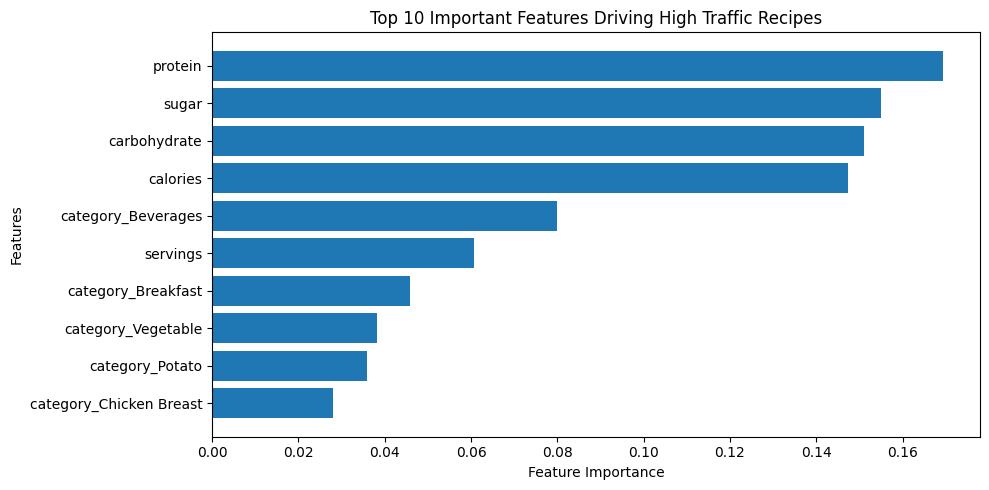

In [118]:
# Extracting feature importance from the Logistic Regression model

# Numeric feature names
numeric_features = preprocessor.transformers_[0][2]

# Get category feature names from the OneHotEncoder
cat_features = preprocessor.named_transformers_['cat'].get_feature_names_out(['category'])

# Combine both
all_features = list(numeric_features) + list(cat_features)

# Getting importance values
importances = rf_model.named_steps['classifier'].feature_importances_

# Creating a DataFrame
feature_importance = pd.DataFrame({
    'Feature': all_features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Converting importance to percentages
feature_importance['Importance (%))'] = feature_importance['Importance'] * 100

# Plot
plt.figure(figsize=(10,5))
plt.barh(feature_importance['Feature'][:10], feature_importance['Importance'][:10])
plt.gca().invert_yaxis()
plt.title("Top 10 Important Features Driving High Traffic Recipes")
plt.xlabel("Feature Importance")
plt.ylabel("Features")

plt.tight_layout()
plt.show()
